# Convulutional Neural Network
## David Darigan (C00263218)

Using CNN to identify a digit (0-9) using the MNIST dataset

# Change 1

Using a 2-layer CNN with a max pooling of 64, we have a ridicolously low loss rate of 0.001~ (effectivelly 99%) which initially makes me suspicious.
<br>
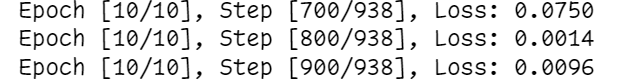

# Change 2

Doubled the hidden layer from 128 to 256 which ended in a result of apparently 100% accuracy (or at least a loss rate so low it is imperceptible)

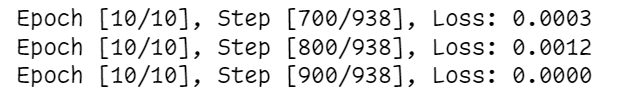

# Change 3

Previous accuracy was on the trained set, our test set gives us an accuracy of 99.10% which seems somewhat reasonable. 

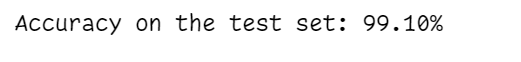

# Change 4

Returning the hidden layer to 128, we're still hitting 99% accuracy on the test set. I don't think there is anything wrong here, it just might be that good. 

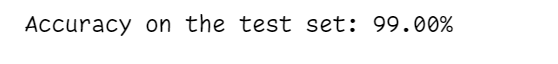

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [27]:
# Loading training / test sets
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [62]:
# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(64 * 6 * 6, 128) 
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))
        x = x.view(-1, 64 * 6 * 6)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [65]:
learning_rate = 0.001
num_epochs = 10

model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# Training loop
total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_steps}], Loss: {loss.item():.4f}')

print('Training Finished!')
torch.save(model.state_dict(), "mnist_cnn_model.pth")

Epoch [1/10], Step [100/938], Loss: 0.2400
Epoch [1/10], Step [200/938], Loss: 0.0315
Epoch [1/10], Step [300/938], Loss: 0.1661
Epoch [1/10], Step [400/938], Loss: 0.1603
Epoch [1/10], Step [500/938], Loss: 0.0193
Epoch [1/10], Step [600/938], Loss: 0.0332
Epoch [1/10], Step [700/938], Loss: 0.0758
Epoch [1/10], Step [800/938], Loss: 0.0398
Epoch [1/10], Step [900/938], Loss: 0.0863
Epoch [2/10], Step [100/938], Loss: 0.0792
Epoch [2/10], Step [200/938], Loss: 0.0206
Epoch [2/10], Step [300/938], Loss: 0.0173
Epoch [2/10], Step [400/938], Loss: 0.0243
Epoch [2/10], Step [500/938], Loss: 0.0282
Epoch [2/10], Step [600/938], Loss: 0.0076
Epoch [2/10], Step [700/938], Loss: 0.0102
Epoch [2/10], Step [800/938], Loss: 0.0036
Epoch [2/10], Step [900/938], Loss: 0.0025
Epoch [3/10], Step [100/938], Loss: 0.0078
Epoch [3/10], Step [200/938], Loss: 0.0059
Epoch [3/10], Step [300/938], Loss: 0.0093
Epoch [3/10], Step [400/938], Loss: 0.0795
Epoch [3/10], Step [500/938], Loss: 0.0079
Epoch [3/10

In [69]:
# Test the CNN

def test_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')


# Test the model
trained_model = CNN()
trained_model.load_state_dict(torch.load('mnist_cnn_model.pth'))
test_model(trained_model, test_loader)

Accuracy on the test set: 99.00%
